In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from sklearn.decomposition import PCA
from numpy.linalg import eig
import seaborn as sns
%matplotlib inline

In [2]:
left = np.load("./matrix_source/video_4_left_m.mp4.npy")
mid = np.load("./matrix_source/video_4_mid_m.mp4.npy")
top = np.load("./matrix_source/video_4_top_m.mp4.npy")

切600<br>
  1.保持長度一致

In [3]:
left_600 = left[:600,]
mid_600 = mid[:600,]
top_600 = top[:600,]
M = np.hstack((left_600,mid_600,top_600)).T
M.shape

(6, 600)

pca 是照書上寫出來的

In [4]:
def plot_finction(x,title="title"):
    plt.plot(np.arange(x.shape[0]) , x[:,1] ,"red" ,label="Y")
    plt.plot(np.arange(x.shape[0]) , x[:,0] , "green",label="X")
    red_patch = mpatches.Patch(color='red', label='Y')
    green_patch = mpatches.Patch(color='green', label='X')
    plt.legend(handles=[red_patch,green_patch])
    plt.title(title)
    
def plot_finction2(x,title="title"):
    plt.plot(np.arange(x.shape[0]) , x[:,0] ,"red" ,label="PC1")
    plt.plot(np.arange(x.shape[0]) , x[:,1] , "green",label="PC2")
    red_patch = mpatches.Patch(color='red', label="PC1")
    green_patch = mpatches.Patch(color='green', label="PC2")
    plt.legend(handles=[red_patch,green_patch])
    plt.title(title)
    
def pca(M):
    m , n = M.shape
    mn = np.mean(M, axis=1)
    M_m = M.T-mn
    Cx = (1/(n-1))*M_m.T@M_m
    D,V=eig(Cx)
    return M_m.T,D,V

def plot_pca(x):
    plt.plot(np.arange(x.shape[1]) , x[0,:] ,"red" ,label="PC1")
    plt.plot(np.arange(x.shape[1]) , x[1,:] , "green",label="PC2")
    plt.plot(np.arange(x.shape[1]) , x[2,:] , "cyan",label="PC3")
    plt.plot(np.arange(x.shape[1]) , x[3,:] , "yellow",label="PC4")
    #plt.plot(np.arange(x.shape[0]) , x[:,4] , "green",label="PC5")
    #plt.plot(np.arange(x.shape[0]) , x[:,5] , "green",label="PC6")
    PC1_patch = mpatches.Patch(color='red', label="PC1")
    PC2_patch = mpatches.Patch(color='green', label="PC2")
    PC3_patch = mpatches.Patch(color='cyan', label="PC3")
    PC4_patch = mpatches.Patch(color='yellow', label="PC4")
    plt.legend(handles=[PC1_patch,PC2_patch,PC3_patch,PC4_patch])
    plt.title("PCA")

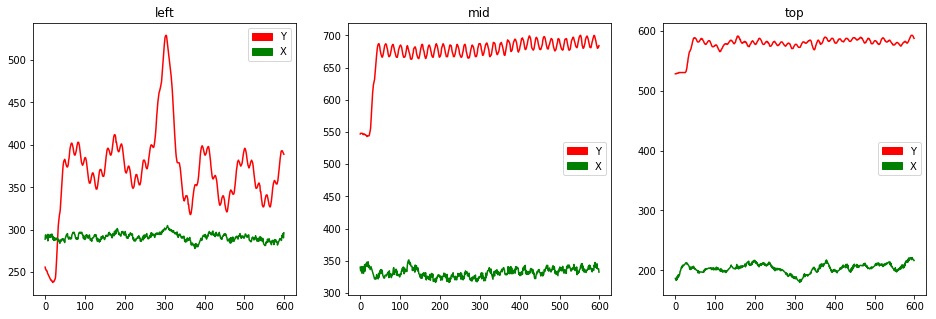

In [5]:
#圖一
plt.figure(figsize=(16,5))
plt.subplot(131)
plot_finction(left_600,title="left")
plt.subplot(132)
plot_finction(mid_600,title="mid")
plt.subplot(133)
plot_finction(top_600,title="top")

In [6]:
M_normalize, D, V = pca(M)
M_pca = V.T @ M_normalize

每個component的解釋量<br>
由此我們可以知道我們大多的varance極中在pc1

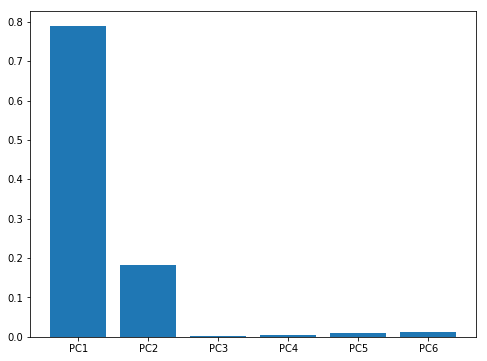

In [7]:
#圖二
tag_tmp=D/sum(D)
x = range(len(tag_tmp))
plt.figure(figsize=(8,6))
plt.bar(x,tag_tmp)
plt.xticks(x,["PC1","PC2","PC3","PC4","PC5","PC6"])
plt.show()

In [8]:
tag_tmp

array([0.78927441, 0.18128534, 0.0023744 , 0.00508568, 0.01086254,
       0.01111762])

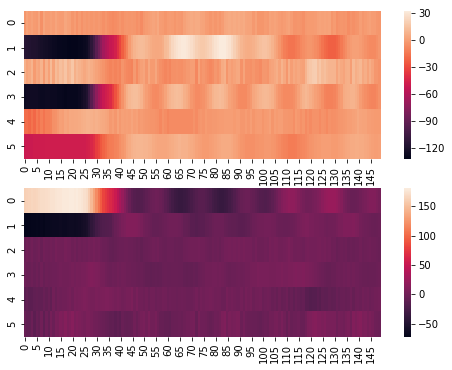

In [9]:
#因太長所以畫前150
#圖三(a)(b)
plt.figure(figsize=(8,6))
plt.subplot(211)
ax = sns.heatmap(M_normalize[:,:150])
plt.subplot(212)
ax = sns.heatmap(M_pca[:,:150])

從pc1~pc5可觀察到pc1的變量最大<br>
且pc1似乎解釋了每個角度y軸的變量

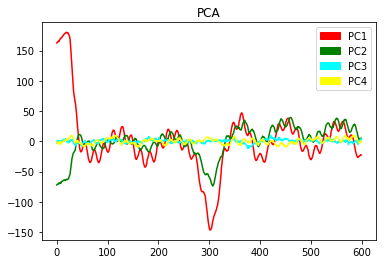

In [10]:
#圖四
plot_pca(M_pca)

pc1 vs left y軸<br>
pc1 vs mid y軸<br>
pc1 vs right y軸<br>

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


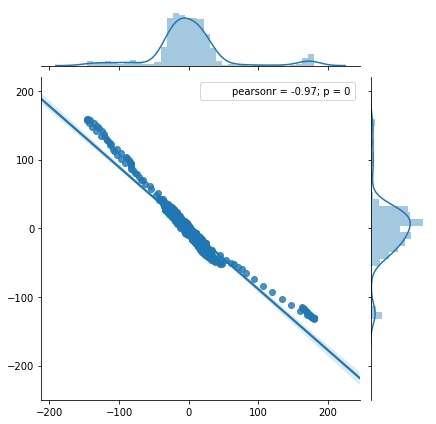

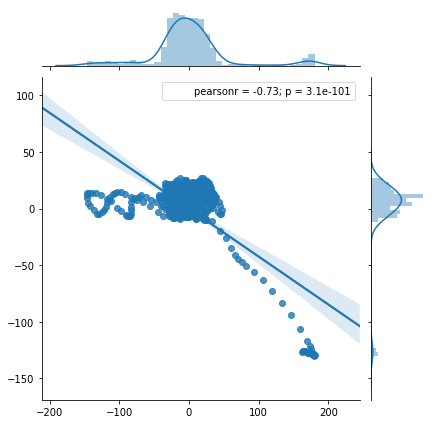

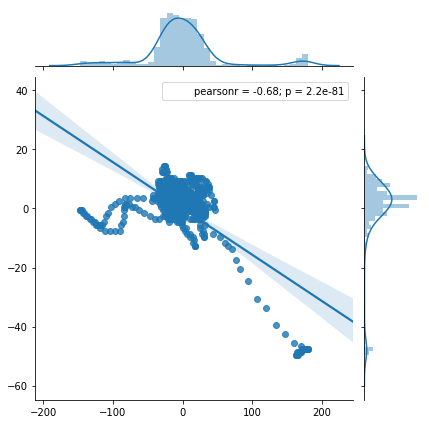

In [11]:
#圖五(a)(b)(c)
a1 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[1,:], kind="reg")
a2 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[3,:], kind="reg")
a3 = sns.jointplot(x=M_pca[0,:] , y= M_normalize[5,:], kind="reg")

pc2 vs left x軸<br>
pc2 vs mid x軸<br>
pc2 vs right x軸<br>

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


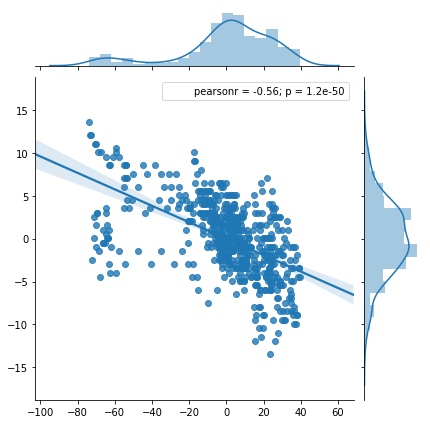

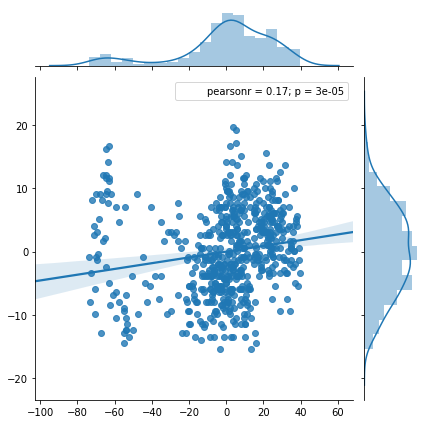

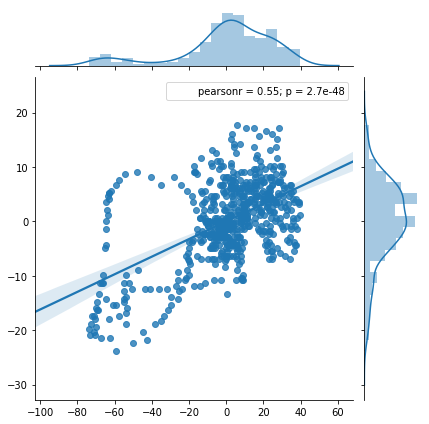

In [12]:
#圖六(a)(b)(c)
a1 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[0,:], kind="reg")
a2 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[2,:], kind="reg")
a3 = sns.jointplot(x=M_pca[1,:] , y= M_normalize[4,:], kind="reg")

pc3 with left x軸<br>
pc3 with left y軸

/home/thtang/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


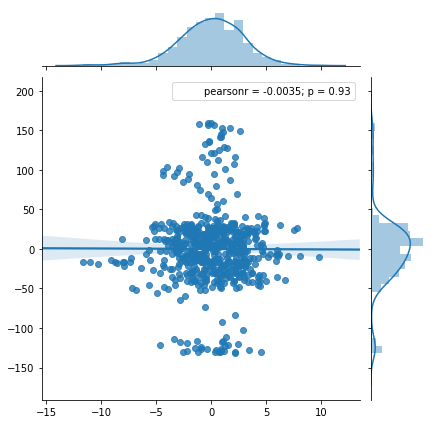

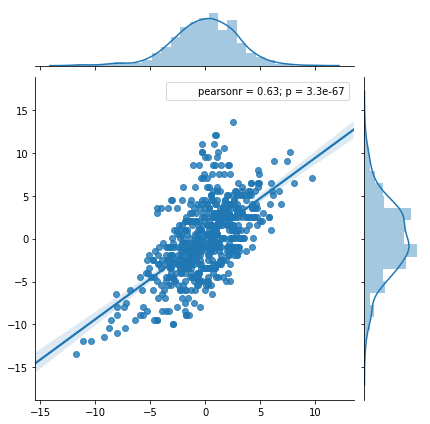

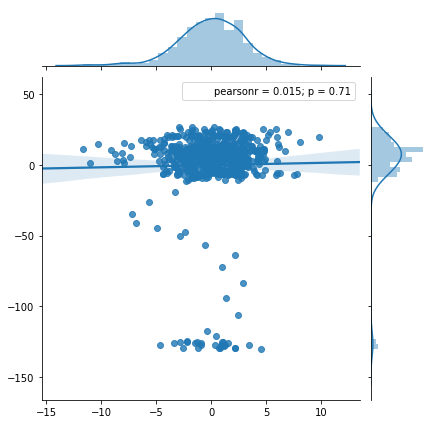

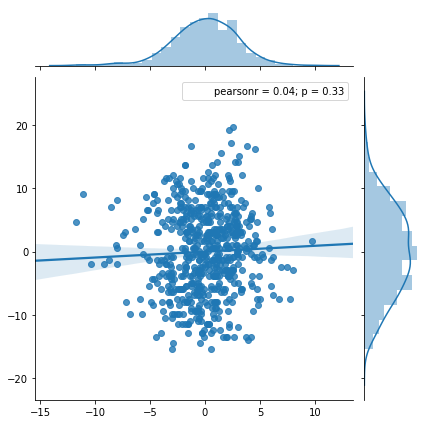

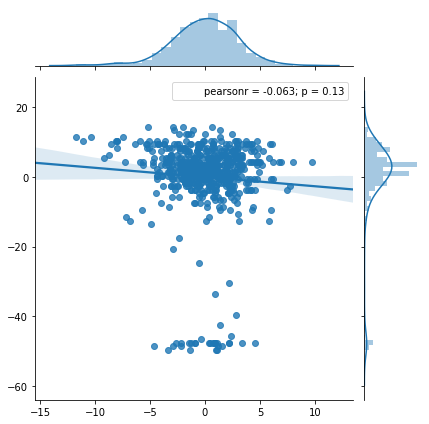

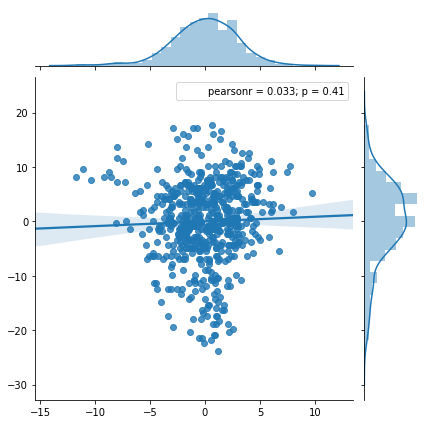

In [13]:
#圖七(a)(b)
sns.jointplot(x=M_pca[2,:] , y= M_normalize[1,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[0,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[3,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[2,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[5,:], kind="reg")
sns.jointplot(x=M_pca[2,:] , y= M_normalize[4,:], kind="reg")

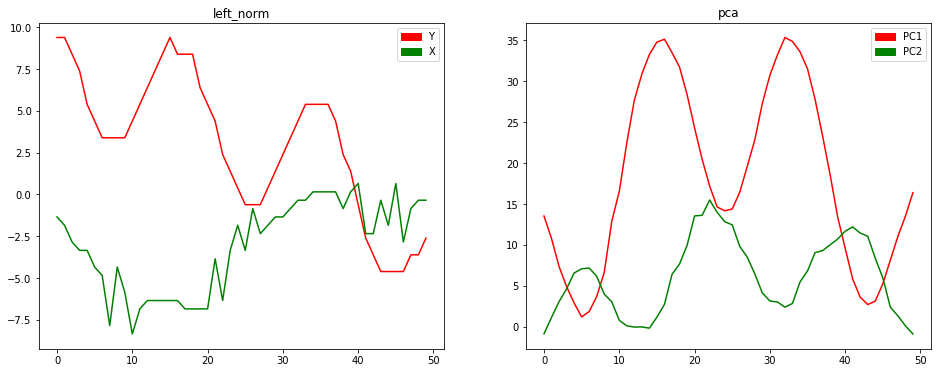

In [15]:
#圖八
plt.figure(figsize=(16,6))
plt.subplot(121)
plot_finction(M_normalize[range(4,6),50:100].T,title="left_norm")
plt.subplot(122)
plot_finction2(-M_pca[range(0,2),50:100].T,title="pca")

結論:<br>

相對於上一份的資料這份資料又加入了手抖的要素，所以在效應分離上沒有前份理想<br>
從圖二中我們就可發現pc1佔整體varance的解釋量有78.6%相對於理想型的96.5%是少了許多，<br>
我想因為手晃因素也占了解釋量的一大部分，<br>
但從圖五可看出pc1與left的correlation很高但與top與mid的相關性就沒那麼高，<br>
我想這是由於每個人手晃的程度或形式不竟相同所以無法這麼好的把效應分離，<br>
接著觀察圖四與圖一可以發現pc1的趨勢有很大的程度與left的y軸相同且left的y軸與top及mid的y軸趨勢上的差異很大，<br>
總額言之因為left與其他的差異太大造成效應分離上沒有前份理想。
